In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
!ls ../dataset/

'[]'	       transfer_learning.ipynb	     Untitled.ipynb   user_5   val
 coba2.ipynb   UAS_transfer_learning.ipynb   user_10	      user_6
 coba.py       Untitled1.ipynb		     user_3	      user_7
 train	       Untitled2.ipynb		     user_4	      user_9


In [3]:
!ls ../dataset/user_10

A0.jpg	C7.jpg	F4.jpg	I1.jpg	L8.jpg	O5.jpg	R2.jpg	T9.jpg		 W5.jpg
A1.jpg	C8.jpg	F5.jpg	I2.jpg	L9.jpg	O6.jpg	R3.jpg	U0.jpg		 W6.jpg
A2.jpg	C9.jpg	F6.jpg	I3.jpg	M0.jpg	O7.jpg	R4.jpg	U1.jpg		 W7.jpg
A3.jpg	D0.jpg	F7.jpg	I4.jpg	M1.jpg	O8.jpg	R5.jpg	U2.jpg		 W8.jpg
A4.jpg	D1.jpg	F8.jpg	I5.jpg	M2.jpg	O9.jpg	R6.jpg	U3.jpg		 W9.jpg
A5.jpg	D2.jpg	F9.jpg	I6.jpg	M3.jpg	P0.jpg	R7.jpg	U4.jpg		 X0.jpg
A6.jpg	D3.jpg	G0.jpg	I7.jpg	M4.jpg	P1.jpg	R8.jpg	U5.jpg		 X1.jpg
A7.jpg	D4.jpg	G1.jpg	I8.jpg	M5.jpg	P2.jpg	R9.jpg	U6.jpg		 X2.jpg
A8.jpg	D5.jpg	G2.jpg	I9.jpg	M6.jpg	P3.jpg	S0.jpg	U7.jpg		 X3.jpg
A9.jpg	D6.jpg	G3.jpg	K0.jpg	M7.jpg	P4.jpg	S1.jpg	U8.jpg		 X4.jpg
B0.jpg	D7.jpg	G4.jpg	K1.jpg	M8.jpg	P5.jpg	S2.jpg	U9.jpg		 X5.jpg
B1.jpg	D8.jpg	G5.jpg	K2.jpg	M9.jpg	P6.jpg	S3.jpg	user_10_loc.csv  X6.jpg
B2.jpg	D9.jpg	G6.jpg	K3.jpg	N0.jpg	P7.jpg	S4.jpg	V0.jpg		 X7.jpg
B3.jpg	E0.jpg	G7.jpg	K4.jpg	N1.jpg	P8.jpg	S5.jpg	V1.jpg		 X8.jpg
B4.jpg	E1.jpg	G8.jpg	K5.jpg	N2.jpg	P9.jpg	S6.jpg	V2.jpg		 X9.jpg
B5.jpg	E2.jpg	G9.

In [4]:
img = cv.imread("../dataset/user_10/A0.jpg")

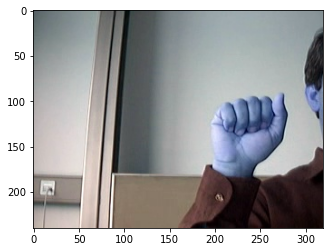

In [5]:
plt.imshow(img)

In [6]:
import pandas as pd
frame = pd.DataFrame()
list_bbox = []
list_bbox.append(pd.read_csv('../dataset/user_10/user_10_loc.csv',index_col=None,header=0))
frame = pd.concat(list_bbox)

In [7]:
list_bbox

[              image  top_left_x  top_left_y  bottom_right_x  bottom_right_y
 0    user_10/A0.jpg         186          84             286             184
 1    user_10/A1.jpg         186          84             286             184
 2    user_10/A2.jpg         185          90             285             190
 3    user_10/A3.jpg         180          88             290             198
 4    user_10/A4.jpg         173         102             293             222
 ..              ...         ...         ...             ...             ...
 235  user_10/Y5.jpg         175          35             295             155
 236  user_10/Y6.jpg         166          36             286             156
 237  user_10/Y7.jpg         186          35             306             155
 238  user_10/Y8.jpg         180          43             300             163
 239  user_10/Y9.jpg         183          59             293             169
 
 [240 rows x 5 columns]]

In [8]:
img = cv.rectangle(img,(frame['top_left_x'][0], frame['top_left_y'][0]), (frame['bottom_right_x'][0], frame['bottom_right_y'][0]),(0,255,0),3)

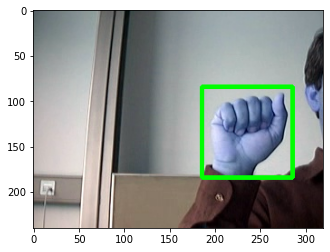

In [9]:
plt.imshow(img)

In [10]:
from PIL import Image
img = Image.open("../dataset/user_10/A0.jpg")
img = img.crop((frame['top_left_x'][0], frame['top_left_y'][0], frame['bottom_right_x'][0], frame['bottom_right_y'][0]))

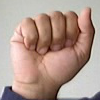

In [11]:
img

In [12]:
folder_train = ''
folder_val = ''
train_path = "../dataset/train/"+folder_train+"/image-train{:01d}.jpg"
val_path = "../dataset/train/"+folder_val+"/image-val{:01d}.jpg"

In [13]:
!ls ../dataset/train/A

image-train0.jpg  image-train3.jpg  image-train6.jpg  image-train9.jpg
image-train1.jpg  image-train4.jpg  image-train7.jpg
image-train2.jpg  image-train5.jpg  image-train8.jpg


In [14]:
def crop(image, kiri_x, kiri_y, kanan_x, kanan_y):
    img = Image.open(image)
    img_crop =  img.crop((kiri_x, kiri_y, kanan_x, kanan_y))
    return img_crop

In [15]:
frame["image"][0][8]

'A'

In [16]:
X = []
Y = []
list_label = ['A','B','C','D','E','F','G','H','I','K','L','M',
          'N','O','P','Q','R','S','T','U','V','W','X','Y',]
frameId = 0
for j in range(len(list_label)):
    for i in range (len(frame)):
        dir_images = '../dataset/'+frame['image'][i]
        cropped = crop(dir_images, frame['top_left_x'][i], frame['top_left_y'][i], frame['bottom_right_x'][i], frame['bottom_right_y'][i])
        folder_train = frame["image"][i][8]
        X.append(cropped)
        if folder_train == list_label[j]:
            img = X[i].save("../dataset/train/"+folder_train+"/image-train{:01d}.jpg".format(frameId, folder_train))
            frameId +=1
        Y.append(frame["image"][i][8])

In [17]:
!ls ../dataset/train/T

image-train180.jpg  image-train183.jpg	image-train186.jpg  image-train189.jpg
image-train181.jpg  image-train184.jpg	image-train187.jpg
image-train182.jpg  image-train185.jpg	image-train188.jpg


In [18]:
img = Image.open("../dataset/train/T/image-train187.jpg")

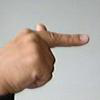

In [19]:
img

In [20]:
frame_val = pd.DataFrame()
list_bbox_val = []
list_bbox_val.append(pd.read_csv('../dataset/user_5/user_5_loc.csv',index_col=None,header=0))
frame_val = pd.concat(list_bbox_val)

In [21]:
list_bbox_val

[             image  top_left_x  top_left_y  bottom_right_x  bottom_right_y
 0    user_5/A0.jpg         181          92             271             182
 1    user_5/A1.jpg         180          95             270             185
 2    user_5/A2.jpg         180          97             270             187
 3    user_5/A3.jpg         180          98             270             188
 4    user_5/A4.jpg         179         103             269             193
 ..             ...         ...         ...             ...             ...
 235  user_5/Y5.jpg         189          32             319             162
 236  user_5/Y6.jpg         173          31             303             161
 237  user_5/Y7.jpg         189          25             319             155
 238  user_5/Y8.jpg         179          18             309             148
 239  user_5/Y9.jpg         189          20             319             150
 
 [240 rows x 5 columns]]

In [22]:
img = cv.imread("../dataset/user_5/A0.jpg")

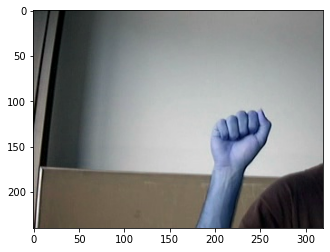

In [23]:
plt.imshow(img)

In [24]:
img = cv.rectangle(img,(frame_val['top_left_x'][0], frame_val['top_left_y'][0]), (frame_val['bottom_right_x'][0], frame_val['bottom_right_y'][0]),(0,255,0),3)

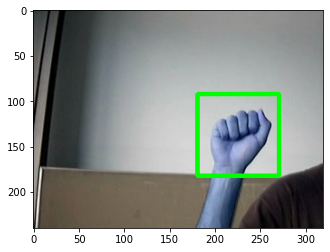

In [25]:
plt.imshow(img)

In [26]:
img = Image.open("../dataset/user_5/A0.jpg")
img = img.crop((frame_val['top_left_x'][0], frame_val['top_left_y'][0], frame_val['bottom_right_x'][0], frame_val['bottom_right_y'][0]))

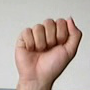

In [27]:
img

In [28]:
X_val = []
Y_val = []
list_label = ['A','B','C','D','E','F','G','H','I','K','L','M',
          'N','O','P','Q','R','S','T','U','V','W','X','Y',]
frameId = i = j = 0
for j in range(len(list_label)):
    for i in range (len(frame_val)):
        dir_images_val = '../dataset/'+frame_val['image'][i]
        cropped_val = crop(dir_images_val, frame_val['top_left_x'][i], frame_val['top_left_y'][i], frame_val['bottom_right_x'][i], frame_val['bottom_right_y'][i])
        folder_val = frame_val["image"][i][7]
        X_val.append(cropped_val)
        if folder_val == list_label[j]:
            img = X_val[i].save("../dataset/val/"+folder_val+"/image-val{:01d}.jpg".format(frameId, folder_val))
            frameId +=1
        Y_val.append(frame_val["image"][i][7])

In [29]:
!ls ../dataset/val/A

image-val0.jpg	image-val2.jpg	image-val4.jpg	image-val6.jpg	image-val8.jpg
image-val1.jpg	image-val3.jpg	image-val5.jpg	image-val7.jpg	image-val9.jpg


In [30]:
from torchvision import datasets, transforms  

In [31]:
train_dir = "../dataset/train/"
val_dir = "../dataset/val/"

In [32]:
image_datasets = {}

In [33]:
image_datasets['train'] = datasets.ImageFolder(train_dir)

In [34]:
image_datasets['val'] = datasets.ImageFolder(val_dir)

In [35]:
img, label = image_datasets['train'][0]

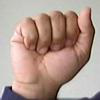

In [36]:
img

In [37]:
label

0

In [38]:
data_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [39]:
data_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [40]:
image_datasets['train'] = datasets.ImageFolder(train_dir, transform=data_transforms)

In [41]:
image_datasets['val'] = datasets.ImageFolder(val_dir, transform=data_transforms)

In [42]:
img, label = image_datasets['train'][0]

In [43]:
img

tensor([[[ 1.0673,  1.0673,  1.0844,  ...,  1.0159,  1.0159,  1.0159],
         [ 1.0673,  1.0673,  1.0844,  ...,  1.0159,  1.0159,  1.0159],
         [ 1.0844,  1.0844,  1.1015,  ...,  1.0331,  1.0331,  1.0331],
         ...,
         [ 0.3994,  0.3138,  0.1083,  ..., -1.3987, -1.4158, -1.4158],
         [ 0.2282,  0.1426, -0.0629,  ..., -1.4158, -1.4329, -1.4329],
         [ 0.1597,  0.0741, -0.1314,  ..., -1.4329, -1.4500, -1.4500]],

        [[ 1.2381,  1.2381,  1.2556,  ...,  1.2031,  1.2031,  1.2031],
         [ 1.2381,  1.2381,  1.2556,  ...,  1.2031,  1.2031,  1.2031],
         [ 1.2556,  1.2556,  1.2731,  ...,  1.2206,  1.2206,  1.2206],
         ...,
         [ 0.5203,  0.4328,  0.2227,  ..., -1.3880, -1.4055, -1.4055],
         [ 0.3452,  0.2577,  0.0476,  ..., -1.4055, -1.4230, -1.4230],
         [ 0.2752,  0.1877, -0.0224,  ..., -1.4230, -1.4405, -1.4405]],

        [[ 1.3502,  1.3502,  1.3677,  ...,  1.2282,  1.2282,  1.2282],
         [ 1.3502,  1.3502,  1.3677,  ...,  1

Transfer Learning

VGG (Visual Geometry Group)

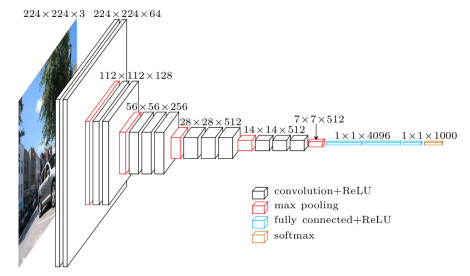

In [44]:
from torchvision import models

In [45]:
model = models.vgg11(pretrained=True)

In [46]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [47]:
import torch.nn as nn

In [48]:
model.classifier[6] = nn.Linear(4096, 24)

In [49]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [52]:
for param in model.features.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [51]:
for param in model.features.parameters():
    param.requires_grad = False

In [53]:
criterion = nn.CrossEntropyLoss()

In [54]:
import torch.optim as optim

In [55]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [56]:
dataloaders = {}

In [57]:
dataloaders['train'] = torch.utils.data.DataLoader(image_datasets['train'], batch_size=4, shuffle=True, num_workers=4)

In [58]:
device = torch.device('cpu')

In [59]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [60]:
num_epoch = 10
list_loss = []
list_acc = []
for epoch in range(num_epoch):
    train_loss = 0.0
    train_acc = 0.0
    train_corrects = 0
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model.forward(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        train_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = train_loss / len(image_datasets['train'])
    epoch_acc = train_corrects.double() / len(image_datasets['train'])
    
    list_loss.append(epoch_loss)
    list_acc.append(epoch_acc)
    
    print('Loss : {:.4f} Acc : {:.4f}'.format(epoch_loss, epoch_acc))

Loss : 2.5574 Acc : 0.3417
Loss : 0.5554 Acc : 0.8500
Loss : 0.0991 Acc : 0.9792
Loss : 0.0232 Acc : 1.0000
Loss : 0.0089 Acc : 1.0000
Loss : 0.0023 Acc : 1.0000
Loss : 0.0061 Acc : 1.0000
Loss : 0.0021 Acc : 1.0000
Loss : 0.0015 Acc : 1.0000
Loss : 0.0006 Acc : 1.0000


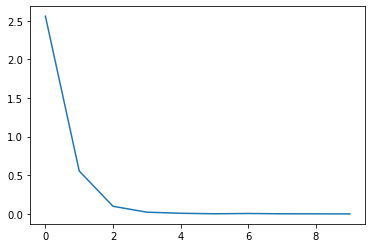

In [63]:
plt.plot(list_loss)

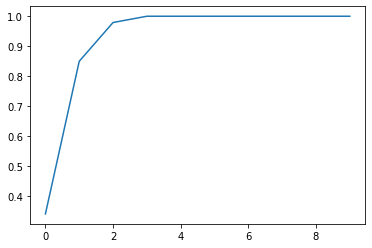

In [64]:
plt.plot(list_acc)

In [65]:
dataloaders['val'] = torch.utils.data.DataLoader(image_datasets['val'], batch_size=4, shuffle=True, num_workers=4)

In [66]:
val_corrects = 0
for inputs, labels in dataloaders['val']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    val_corrects += torch.sum(preds == labels.data)

In [67]:
acc = val_corrects / len(image_datasets['val'])

In [68]:
val_corrects

tensor(99)

In [69]:
acc.item()

0.4124999940395355

In [95]:
!ls "../dataset/val/A"

image-val0.jpg	image-val2.jpg	image-val4.jpg	image-val6.jpg	image-val8.jpg
image-val1.jpg	image-val3.jpg	image-val5.jpg	image-val7.jpg	image-val9.jpg


In [96]:
img = Image.open("../dataset/val/A/image-val7.jpg")

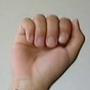

In [97]:
img

In [98]:
img_tensor = data_transforms(img).to(device)

In [99]:
img_tensor.shape

torch.Size([3, 224, 224])

In [100]:
output = model.forward(img_tensor.reshape(1, 3, 224, 224))

In [101]:
output.argmax().item()

0

In [102]:
list_label[output.argmax().item()]

'A'